Set OBSGEO-B to   -36.876066 from OBSGEO-[XYZ].
Set OBSGEO-H to 1724775587.000 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


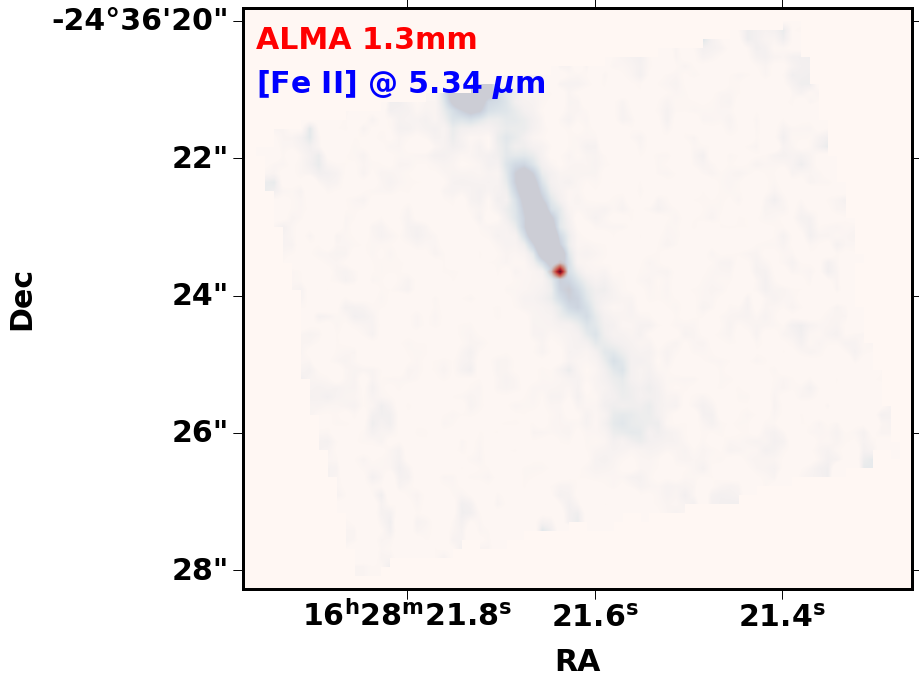

In [1]:
from astropy.io import fits
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename
from astropy.nddata import Cutout2D
from reproject import reproject_interp
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.patches as mpatches



plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 30
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize'] =30
plt.rcParams['legend.fontsize'] = 30
plt.rcParams['figure.titlesize'] = 30
plt.rcParams['axes.labelweight']='heavy'
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.minor.size'] = 5

hdu1 = fits.open('Fe_534.fits')[0]
hdu2 = fits.open('IRAS16253_SBLB_continuum_robust_0.0.pbcor.tt0.fits')[0]

RA=247.0901709 #JWST
Dec=-24.6065499 #JWST
data1 = hdu1.data
wcs1 = WCS(hdu1.header)
data2 = hdu2.data
hdu2.header['WCSAXES']=2
wcs2 = WCS(hdu2.header)
wcs2.naxis=2
hdu2.header.update(wcs2.to_header())

#print(hdu2.header)
# If the two images have different WCS coordinates, reproject the second image onto the first WCS
plt.figure(figsize=[12,12])
data2, footprint = reproject_interp(hdu2, hdu1.header)

plt.subplot(projection=wcs1) 
rects2=plt.imshow(data1, origin='lower',cmap='Blues',alpha=1,interpolation='bilinear',vmin=0.01,vmax=0.5) 
rects1=plt.imshow(data2, origin='lower',cmap='Reds',alpha=0.8,interpolation='bilinear',vmin=0.0001) 

plt.text(1,60,'ALMA 1.3mm',color='r')
plt.text(1,55,'[Fe II] @ 5.34 $\mu$m',color='b')

plt.xlabel('RA')
plt.ylabel('Dec')

Set OBSGEO-B to   -36.876066 from OBSGEO-[XYZ].
Set OBSGEO-H to 1724775587.000 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -36.845749 from OBSGEO-[XYZ].
Set OBSGEO-H to 1724348320.928 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


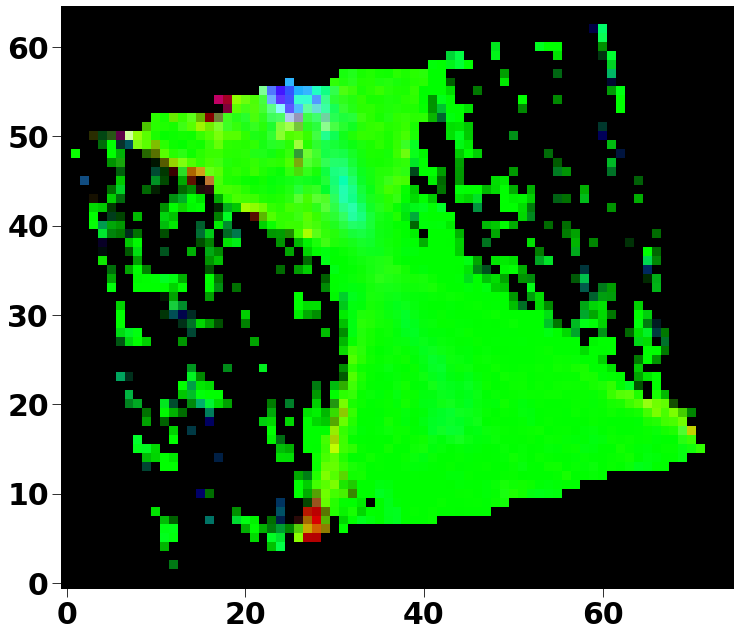

In [2]:
from astropy.io import fits
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename
from astropy.nddata import Cutout2D
from reproject import reproject_interp
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.patches as mpatches
from astropy.visualization import make_lupton_rgb
import numpy as np

plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 30
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize'] =30
plt.rcParams['legend.fontsize'] = 30
plt.rcParams['figure.titlesize'] = 30
plt.rcParams['axes.labelweight']='heavy'
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.minor.size'] = 5

hdu1 = fits.open('Fe_534.fits')[0]
hdu2 = fits.open('CO_moment0.fits')[0]
hdu3 = fits.open('H2_S5.fits')[0]


RA=247.0901709 #JWST
Dec=-24.6065499 #JWST
data1 = hdu1.data
wcs1 = WCS(hdu1.header)
data2 = hdu2.data
hdu2.header['WCSAXES']=2
wcs2 = WCS(hdu2.header)
wcs2.naxis=2
hdu2.header.update(wcs2.to_header())


#print(hdu2.header)
# If the two images have different WCS coordinates, reproject the second image onto the first WCS
plt.figure(figsize=[12,12])
data2, footprint = reproject_interp(hdu2, hdu1.header)
data3, footprint = reproject_interp(hdu3, hdu1.header)

#data1=data1/(np.max(data1))
#data2=data2/(np.max(data2))

rgb_default = make_lupton_rgb(data2*1e-2,  data3*5000, data1*1000, minimum=30, Q=0.15, stretch=300)
plt.imshow(rgb_default, origin='lower')



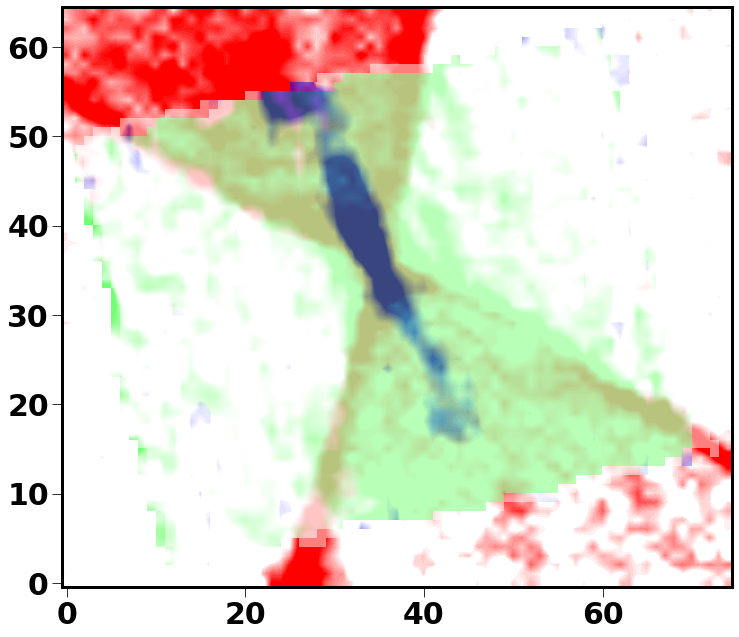

In [34]:
plt.figure(figsize=[12,12])
from matplotlib.colors import LinearSegmentedColormap
colors = [(1, 1, 1), (1, 0, 0)] # first color is black, last is red
cm = LinearSegmentedColormap.from_list(
        "Custom", colors, N=20)

colors = [(1, 1, 1), (0, 0, 1)] # first color is black, last is red
cm1 = LinearSegmentedColormap.from_list(
        "Custom", colors, N=20)

colors = [(1, 1, 1), (0, 1, 0)] # first color is black, last is red
cm3 = LinearSegmentedColormap.from_list(
        "Custom", colors, N=20)

rects2=plt.imshow(data1, origin='lower',cmap=cm1,alpha=0.5,interpolation='bilinear',vmin=0.1,vmax=0.3,zorder=11) 
rects1=plt.imshow(data2, origin='lower',cmap=cm,alpha=1,interpolation='bilinear',vmin=1000,vmax=20000) 
rects3=plt.imshow(data3, origin='lower',cmap=cm3,alpha=0.55,interpolation='bilinear',vmin=0.02,vmax=0.1,zorder=8) 

In [8]:

import aplpy
aplpy.make_rgb_cube([ 'CO_moment0.fits',
                     'H2_S5.fits','Fe_534.fits'], 'CO+H5+Fe.fits')

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -36.845749 from OBSGEO-[XYZ].
Set OBSGEO-H to 1724348320.928 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -36.876066 from OBSGEO-[XYZ].
Set OBSGEO-H to 1724775587.000 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


INFO: Red: [aplpy.rgb]
INFO: vmin =  1.000e+02 [aplpy.rgb]
INFO: vmax =  1.500e+04 [aplpy.rgb]
INFO: Green: [aplpy.rgb]
INFO: vmin =  8.000e-02 [aplpy.rgb]
INFO: vmax =  3.000e-01 [aplpy.rgb]
INFO: Blue: [aplpy.rgb]
INFO: vmin =  1.000e-01 [aplpy.rgb]
INFO: vmax =  3.000e-01 [aplpy.rgb]


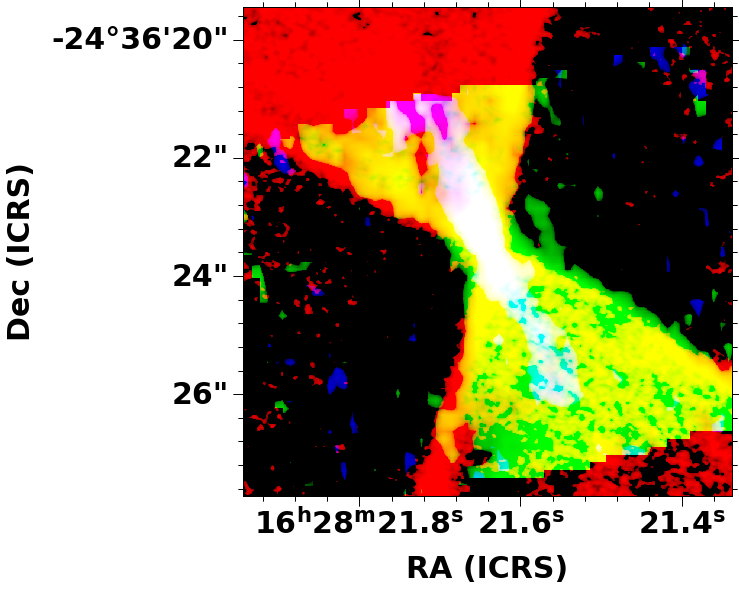

In [47]:
aplpy.make_rgb_image('CO+H5+Fe.fits', 'CO+H5+Fe.png', stretch_b='log',stretch_g='log',stretch_r='log',vmin_b=0.1,vmax_b=0.3,vmin_g=0.08,vmax_g=0.3,vmin_r=100,vmax_r=15000)
f = aplpy.FITSFigure('CO+H5+Fe_2d.fits')
f.recenter(RA, Dec, width=0.0023, height=0.0023)
f.show_rgb('CO+H5+Fe.png')

Set OBSGEO-B to   -36.965746 from OBSGEO-[XYZ].
Set OBSGEO-H to 1726065897.713 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -36.876066 from OBSGEO-[XYZ].
Set OBSGEO-H to 1724775587.000 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -36.965746 from OBSGEO-[XYZ].
Set OBSGEO-H to 1726065897.713 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


<Figure size 864x864 with 0 Axes>

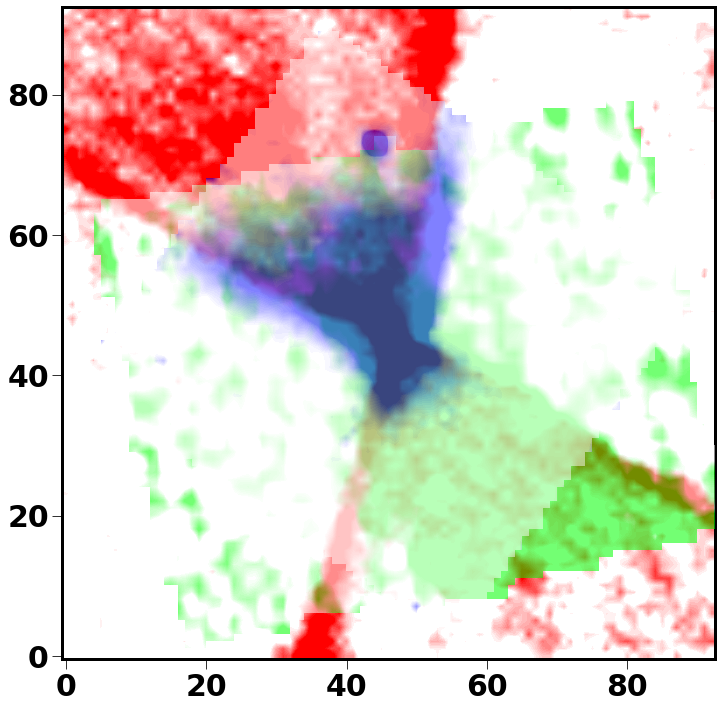

In [1]:
from astropy.io import fits
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename
from astropy.nddata import Cutout2D
from reproject import reproject_interp
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.patches as mpatches
from astropy.visualization import make_lupton_rgb
import numpy as np

plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 30
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize'] =30
plt.rcParams['legend.fontsize'] = 30
plt.rcParams['figure.titlesize'] = 30
plt.rcParams['axes.labelweight']='heavy'
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.minor.size'] = 5

hdu1 = fits.open('cont_41.fits')[0]
hdu2 = fits.open('CO_moment0.fits')[0]
hdu3 = fits.open('H2_S7.fits')[0]


RA=247.0901709 #JWST
Dec=-24.6065499 #JWST
data1 = hdu1.data
wcs1 = WCS(hdu1.header)
data2 = hdu2.data
hdu2.header['WCSAXES']=2
wcs2 = WCS(hdu2.header)
wcs2.naxis=2
hdu2.header.update(wcs2.to_header())


#print(hdu2.header)
# If the two images have different WCS coordinates, reproject the second image onto the first WCS
plt.figure(figsize=[12,12])
data2, footprint = reproject_interp(hdu2, hdu1.header)
data3, footprint = reproject_interp(hdu3, hdu1.header)

#data1=data1/(np.max(data1))
#data2=data2/(np.max(data2))

plt.figure(figsize=[12,12])
from matplotlib.colors import LinearSegmentedColormap
colors = [(1, 1, 1), (1, 0, 0)] # first color is black, last is red
cm = LinearSegmentedColormap.from_list(
        "Custom", colors, N=20)

colors = [(1, 1, 1), (0, 0, 1)] # first color is black, last is red
cm1 = LinearSegmentedColormap.from_list(
        "Custom", colors, N=20)

colors = [(1, 1, 1), (0, 1, 0)] # first color is black, last is red
cm3 = LinearSegmentedColormap.from_list(
        "Custom", colors, N=20)

rects2=plt.imshow(data1, origin='lower',cmap=cm1,alpha=0.5,interpolation='bilinear',vmin=0.01,vmax=0.03,zorder=11) 
rects1=plt.imshow(data2, origin='lower',cmap=cm,alpha=1,interpolation='bilinear',vmin=1000,vmax=20000) 
rects3=plt.imshow(data3, origin='lower',cmap=cm3,alpha=0.55,interpolation='bilinear',vmin=0.02,vmax=0.1,zorder=8) 


<Figure size 864x864 with 0 Axes>

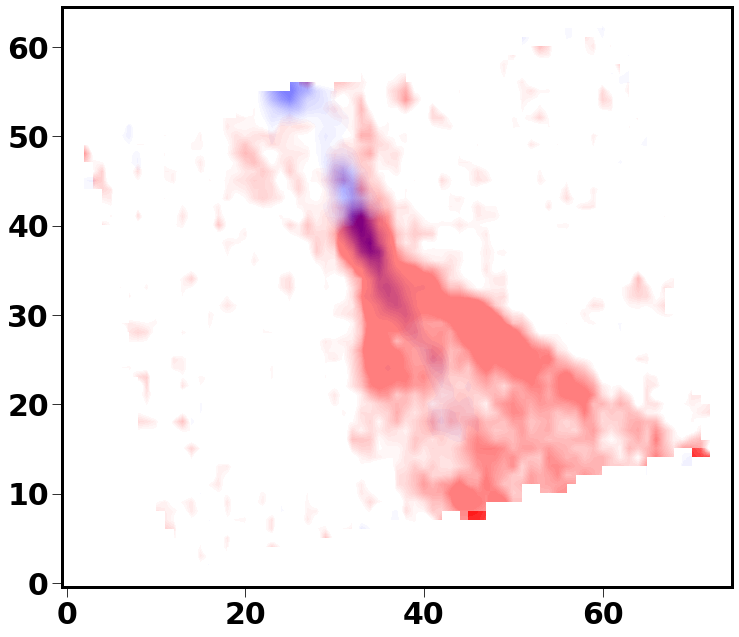

In [11]:
from astropy.io import fits
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename
from astropy.nddata import Cutout2D
from reproject import reproject_interp
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.patches as mpatches
from astropy.visualization import make_lupton_rgb
import numpy as np

plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 30
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize'] =30
plt.rcParams['legend.fontsize'] = 30
plt.rcParams['figure.titlesize'] = 30
plt.rcParams['axes.labelweight']='heavy'
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.minor.size'] = 5

hdu1 = fits.open('Fe_534.fits')[0]
hdu2 = fits.open('CO_moment0.fits')[0]
hdu3 = fits.open('H2_S7.fits')[0]


RA=247.0901709 #JWST
Dec=-24.6065499 #JWST
data1 = hdu1.data
wcs1 = WCS(hdu1.header)
data2 = hdu2.data
hdu2.header['WCSAXES']=2
wcs2 = WCS(hdu2.header)
wcs2.naxis=2
hdu2.header.update(wcs2.to_header())


#print(hdu2.header)
# If the two images have different WCS coordinates, reproject the second image onto the first WCS
plt.figure(figsize=[12,12])
data2, footprint = reproject_interp(hdu2, hdu1.header)
data3, footprint = reproject_interp(hdu3, hdu1.header)

#data1=data1/(np.max(data1))
#data2=data2/(np.max(data2))

plt.figure(figsize=[12,12])
from matplotlib.colors import LinearSegmentedColormap
colors = [(1, 1, 1), (1, 0, 0)] # first color is black, last is red
cm = LinearSegmentedColormap.from_list(
        "Custom", colors, N=20)

colors = [(1, 1, 1), (0, 0, 1)] # first color is black, last is red
cm1 = LinearSegmentedColormap.from_list(
        "Custom", colors, N=20)

colors = [(1, 1, 1), (0, 1, 0)] # first color is black, last is red
cm3 = LinearSegmentedColormap.from_list(
        "Custom", colors, N=20)

rects2=plt.imshow(data1, origin='lower',cmap=cm1,alpha=0.5,interpolation='bilinear',vmin=0.1,vmax=1,zorder=11) 
#rects1=plt.imshow(data2, origin='lower',cmap=cm,alpha=1,interpolation='bilinear',vmin=1000,vmax=20000) 
rects3=plt.imshow(data3, origin='lower',cmap=cm,alpha=1,interpolation='bilinear',vmin=0.05,vmax=0.3,zorder=8) 


<Figure size 864x864 with 0 Axes>

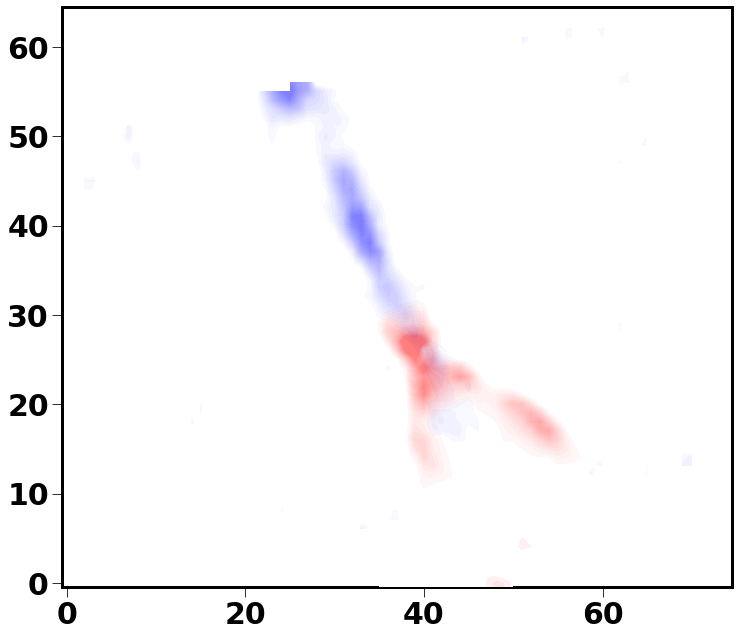

In [12]:
from astropy.io import fits
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename
from astropy.nddata import Cutout2D
from reproject import reproject_interp
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.patches as mpatches
from astropy.visualization import make_lupton_rgb
import numpy as np

plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 30
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize'] =30
plt.rcParams['legend.fontsize'] = 30
plt.rcParams['figure.titlesize'] = 30
plt.rcParams['axes.labelweight']='heavy'
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.minor.size'] = 5

hdu1 = fits.open('Fe_534.fits')[0]
hdu2 = fits.open('CO_moment0.fits')[0]
hdu3 = fits.open('H2_S8.fits')[0]


RA=247.0901709 #JWST
Dec=-24.6065499 #JWST
data1 = hdu1.data
wcs1 = WCS(hdu1.header)
data2 = hdu2.data
hdu2.header['WCSAXES']=2
wcs2 = WCS(hdu2.header)
wcs2.naxis=2
hdu2.header.update(wcs2.to_header())


#print(hdu2.header)
# If the two images have different WCS coordinates, reproject the second image onto the first WCS
plt.figure(figsize=[12,12])
data2, footprint = reproject_interp(hdu2, hdu1.header)
data3, footprint = reproject_interp(hdu3, hdu1.header)

#data1=data1/(np.max(data1))
#data2=data2/(np.max(data2))

plt.figure(figsize=[12,12])
from matplotlib.colors import LinearSegmentedColormap
colors = [(1, 1, 1), (1, 0, 0)] # first color is black, last is red
cm = LinearSegmentedColormap.from_list(
        "Custom", colors, N=20)

colors = [(1, 1, 1), (0, 0, 1)] # first color is black, last is red
cm1 = LinearSegmentedColormap.from_list(
        "Custom", colors, N=20)

colors = [(1, 1, 1), (0, 1, 0)] # first color is black, last is red
cm3 = LinearSegmentedColormap.from_list(
        "Custom", colors, N=20)

rects2=plt.imshow(data1, origin='lower',cmap=cm1,alpha=0.5,interpolation='bilinear',vmin=0.1,vmax=1,zorder=11) 
#rects1=plt.imshow(data2, origin='lower',cmap=cm,alpha=1,interpolation='bilinear',vmin=1000,vmax=20000) 
rects3=plt.imshow(data3, origin='lower',cmap=cm,alpha=1,interpolation='bilinear',vmin=0.05,vmax=0.3,zorder=8) 
